<a href="https://colab.research.google.com/github/arivers444/Project_Finale/blob/Angela/HOF_randomF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Initial imports.
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sn
import matplotlib.pyplot as plt

# Initial Trial with csv files

In [ ]:
# from google.colab import files 
# uploaded = files.upload()

In [ ]:
# import io
# df = pd.read_csv(io.BytesIO(uploaded['ml_BattingFielding.csv']))
# df.head()
# # Dataset is now stored in a Pandas Dataframe

# Database Connection

In [ ]:
# dependencies
import psycopg2
from config import config

In [ ]:
# get parameters
params = config()

In [ ]:
# connect to PostgreSQL database
conn = psycopg2.connect(**params)

# create a new cursor
cur = conn.cursor()

In [ ]:
# funcion to create a pandas df given parameters of: 1. SQL query 2. database connection
def create_pandas_table(sql_query, database = conn):
    table = pd.read_sql_query(sql_query, database)
    return table

In [ ]:
# trial with only 1 table
batting_df = create_pandas_table('SELECT * FROM "Batting"')
batting_df.head()

,playerID,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,AVG
0,aardsda01,331,4,0,0,0,0,0,0.0,0.0,0.0,0,2.0,0.0,0.0,1.0,0.0,0.0,0.000000
1,aaronha01,3298,12364,2174,3771,624,98,755,2297.0,240.0,73.0,1402,1383.0,293.0,32.0,21.0,121.0,328.0,0.304998
2,aaronto01,437,944,102,216,42,6,13,94.0,9.0,8.0,86,145.0,3.0,0.0,9.0,6.0,36.0,0.228814
3,aasedo01,448,5,0,0,0,0,0,0.0,0.0,0.0,0,3.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,abadan01,15,21,1,2,0,0,0,0.0,0.0,1.0,4,5.0,0.0,0.0,0.0,0.0,1.0,0.095238


### Build batting and fielding dataframe

In [ ]:
# build batting/fielding df for machine learning analysis with SQL JOIN  multiple tables
combined_df = create_pandas_table('SELECT h."playerID",h."inducted", b."R",b."H",b."2B",b."3B",b."HR",b."RBI",b."SB", \
                                b."CS",b."BB",b."SO",b."IBB",b."SH",b."SF",b."GIDP",b."AVG",f."PO",f."A",f."E",f."DP",a."award_count" \
                                   FROM "Hall_Of_Fame" AS h \
                                   INNER JOIN "Batting" as b ON (h."playerID" = b."playerID") \
                                   INNER JOIN "Fielding" as f ON (h."playerID" = f."playerID") \
                                   INNER JOIN "Awards" as a ON (h."playerID" = a."playerID")')
combined_df.head()

,playerID,inducted,R,H,2B,3B,HR,RBI,SB,CS,...,IBB,SH,SF,GIDP,AVG,PO,A,E,DP,award_count
0,aaronha01,Y,2174,3771,624,98,755,2297.0,240.0,73.0,...,293.0,21.0,121.0,328.0,0.304998,7436,429,144.0,218,16
1,abbotji01,N,0,2,0,0,0,3.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.095238,72,300,9.0,16,2
2,adamsba01,N,79,216,31,15,3,75.0,1.0,1.0,...,0.0,35.0,0.0,0.0,0.211973,58,648,17.0,17,2
3,ageeto01,N,558,999,170,27,130,433.0,167.0,81.0,...,26.0,21.0,15.0,99.0,0.255368,2371,53,61.0,18,3
4,akerja01,N,3,7,2,0,0,4.0,0.0,0.0,...,0.0,10.0,0.0,1.0,0.076087,65,167,8.0,20,1


In [ ]:
combined_df.shape

(751, 22)

In [ ]:
combined_df.isnull().sum()

playerID       0
inducted       0
R              0
H              0
2B             0
3B             0
HR             0
RBI            0
SB             0
CS             0
BB             0
SO             0
IBB            0
SH             0
SF             0
GIDP           0
AVG            5
PO             0
A              0
E              0
DP             0
award_count    0
dtype: int64

In [ ]:
# drop the rows with null values
combined_df = combined_df.dropna(subset=['AVG'])

In [ ]:
# double check df shape
combined_df.shape

(746, 22)

### Build pitching dataframe

In [ ]:
# build pitching df for machine learning analysis with SQL JOIN multiple tables
pitching_df = create_pandas_table('SELECT h."playerID",h."inducted",p."W",p."L",p."CG",p."SHO",p."SV",p."H_allowed",p."ER",p."HR_allowed",p."BB_allowed",p."StruckOut",p."BAOpp",p."ERA",p."WP",p."HitBatsmen",p."BK",p."R_allowed",p."SH_allowed",p."SF_allowed",p."GIDP_pitcher",a."award_count" FROM "Hall_Of_Fame" AS h INNER JOIN "Pitching" as p ON (h."playerID" = p."playerID") INNER JOIN "Awards" as a ON (h."playerID" = a."playerID")')
pitching_df.head()

,playerID,inducted,W,L,CG,SHO,SV,H_allowed,ER,HR_allowed,...,BAOpp,ERA,WP,HitBatsmen,BK,R_allowed,SH_allowed,SF_allowed,GIDP_pitcher,award_count
0,abbotji01,N,87,108,31,6,0,1779,791,154,...,0.280364,4.496364,53,32.0,11,880,70.0,47.0,200.0,2
1,adamsba01,N,194,140,206,44,15,2841,917,68,...,0.256667,3.733684,26,47.0,2,1129,0.0,0.0,0.0,2
2,akerja01,N,47,45,0,0,123,679,272,64,...,0.253571,3.854286,13,40.0,0,312,32.0,12.0,19.0,1
3,alexape01,Y,373,208,437,90,32,4868,1476,164,...,0.253810,2.972381,39,70.0,1,1851,0.0,0.0,0.0,21
4,allenjo02,N,142,75,109,17,18,1849,813,104,...,0.244667,3.765333,68,38.0,5,924,0.0,0.0,0.0,4


In [ ]:
# check shape of df
pitching_df.shape

(284, 22)

In [ ]:
# check for null values
pitching_df.isnull().sum()

playerID         0
inducted         0
W                0
L                0
CG               0
SHO              0
SV               0
H_allowed        0
ER               0
HR_allowed       0
BB_allowed       0
StruckOut        0
BAOpp           14
ERA              2
WP               0
HitBatsmen       0
BK               0
R_allowed        0
SH_allowed       0
SF_allowed       0
GIDP_pitcher     0
award_count      0
dtype: int64

In [ ]:
# drop the rows with null values
pitching_df = pitching_df.dropna(subset=['ERA','BAOpp'])

In [ ]:
# double check df shape
pitching_df.shape

(268, 22)

# Machine Learning

In [ ]:
# define which dataframe will be used in machine learning model
# e.g. pitching or batting/fielding

df = combined_df

In [ ]:
# encode inducted column from Y/N to numeric 0/1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2 = df.copy()
df2['inducted'] = le.fit_transform(df2['inducted'])

In [ ]:
# encode playerID to numeric
# possibly remove if we want to keep playerID's as index to later reference player names

# df2['playerID'] = le.fit_transform(df2['playerID'])

In [ ]:
# define input (X) and output (y) variables
# drop columns of unnecessary features in X 
# batting/fielding 1st iteration showed the following features contributed <3%:
# SF, CS, IBB, SB

y = df2["inducted"]
X = df2.drop(columns=["inducted", "playerID", "SF", "CS", "IBB", "SB"])

In [ ]:
# Splitting into Train and Test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [ ]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78) 

In [ ]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [ ]:
# Making predictions using the testing data.
predictions = rf_model.predict(X_test_scaled)

In [ ]:
# Calculating the confusion matrix.
cm = confusion_matrix(y_test, predictions)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,127,12
Actual 1,13,35


In [ ]:
# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)

In [ ]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))


Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,127,12
Actual 1,13,35


Accuracy Score : 0.8663101604278075
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       139
           1       0.74      0.73      0.74        48

    accuracy                           0.87       187
   macro avg       0.83      0.82      0.82       187
weighted avg       0.87      0.87      0.87       187



## Feature Importance

In [ ]:

# importances = rf_model.feature_importances_
# importances

In [ ]:
# Calculate feature importance in the Random Forest model & sort largest to smallest
importances = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
importances

[(0.16147912339241308, 'award_count'),
 (0.09405157260170642, 'R'),
 (0.09112768741100967, 'AVG'),
 (0.09031537296116243, 'H'),
 (0.06312932357843094, 'A'),
 (0.05852511210356192, 'RBI'),
 (0.055836295695513474, 'SO'),
 (0.048173059370415085, 'E'),
 (0.04618862487663315, 'PO'),
 (0.04595590841272363, '3B'),
 (0.0439440495451252, '2B'),
 (0.043821710445384736, 'SH'),
 (0.04295532881342847, 'BB'),
 (0.03826045232174703, 'GIDP'),
 (0.03818608929511483, 'DP'),
 (0.03805028917562995, 'HR')]

In [ ]:
# sort the features by their importance.
sorted(zip(X.columns), reverse=True)

[('award_count',),
 ('SO',),
 ('SH',),
 ('RBI',),
 ('R',),
 ('PO',),
 ('HR',),
 ('H',),
 ('GIDP',),
 ('E',),
 ('DP',),
 ('BB',),
 ('AVG',),
 ('A',),
 ('3B',),
 ('2B',)]

In [ ]:
rf_model.feature_importances_.sum()

1.0

In [ ]:
x = [lis[-1] for lis in importances]
x

NameError: ignored

In [ ]:
y = [lis[0] for lis in importances]
y

[0.16147912339241308,
 0.09405157260170642,
 0.09112768741100967,
 0.09031537296116243,
 0.06312932357843094,
 0.05852511210356192,
 0.055836295695513474,
 0.048173059370415085,
 0.04618862487663315,
 0.04595590841272363,
 0.0439440495451252,
 0.043821710445384736,
 0.04295532881342847,
 0.03826045232174703,
 0.03818608929511483,
 0.03805028917562995]

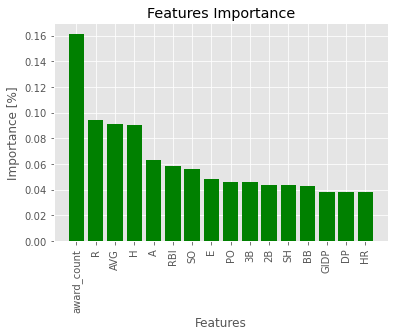

In [ ]:

# DANE'S CODE:
# %matplotlib inline
# plt.style.use('ggplot')
# x = ['R', 'H', '2B', '3B', 'HR', 'RBI', 'BB', 'SO', 'SH', 'AVG', 'PO', 'A', 'E', 'DP', 'award_count']
# y = importances
# x_pos = [i for i, _ in enumerate(x)]

# plt.bar(x_pos, importances, color='green')
# plt.xlabel('Features Importance')
# plt.show()

# NICK's comments
# would like to investigate how to auto generate x list instead of manually entering
# Need to label x ticks
# would like to reorder, largest to smallest

# TRY THIS CODE:
%matplotlib inline
plt.style.use('ggplot')
x = [lis[-1] for lis in importances]
y = [lis[0] for lis in importances]
x_pos = [i for i, _ in enumerate(x)]

plt.bar(x_pos, y, color='green')
plt.title('Features Importance')
plt.xlabel('Features')
plt.ylabel('Importance [%]')

plt.xticks(x_pos,x,rotation=90,ha='center')
plt.show()

## Investigate Predictions

In [ ]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [ ]:
print (X_test) #test dataset (without the actual outcome)
print (y_pred) #predicted values

        R     H   2B  3B   HR     RBI    BB     SO     SH   GIDP       AVG  \
549    82   187   35   4    4    79.0    46  317.0  135.0   11.0  0.167713   
543    45   112   15   1    1    50.0    47  145.0   63.0   17.0  0.184211   
537     0     1    0   0    0     1.0     1    1.0    0.0    0.0  0.166667   
563  1232  2848  482  68  268  1357.0   860  990.0  101.0  297.0  0.267317   
308    42    92   18   0    4    49.0    44  243.0  117.0    6.0  0.122995   
..    ...   ...  ...  ..  ...     ...   ...    ...    ...    ...       ...   
4       3     7    2   0    0     4.0     1   51.0   10.0    1.0  0.076087   
457   940  2091  484  66  191  1097.0   648  779.0   28.0  186.0  0.289692   
620  1074  2472  483  47  248  1389.0   855  694.0   11.0  287.0  0.284793   
627  1257  2460  402  69   28   793.0  1072  589.0  214.0  167.0  0.261814   
431    32    57    3   0    0    23.0    57  217.0   41.0    7.0  0.129252   

        PO     A      E    DP  award_count  
549    328   667  

In [ ]:
df2

,playerID,inducted,R,H,2B,3B,HR,RBI,SB,CS,...,IBB,SH,SF,GIDP,AVG,PO,A,E,DP,award_count
0,aaronha01,1,2174,3771,624,98,755,2297.0,240.0,73.0,...,293.0,21.0,121.0,328.0,0.304998,7436,429,144.0,218,16
1,abbotji01,0,0,2,0,0,0,3.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.095238,72,300,9.0,16,2
2,adamsba01,0,79,216,31,15,3,75.0,1.0,1.0,...,0.0,35.0,0.0,0.0,0.211973,58,648,17.0,17,2
3,ageeto01,0,558,999,170,27,130,433.0,167.0,81.0,...,26.0,21.0,15.0,99.0,0.255368,2371,53,61.0,18,3
4,akerja01,0,3,7,2,0,0,4.0,0.0,0.0,...,0.0,10.0,0.0,1.0,0.076087,65,167,8.0,20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,yountro01,1,1632,3142,583,126,251,1406.0,271.0,105.0,...,95.0,104.0,123.0,217.0,0.285429,5855,4850,305.0,963,12
747,zachrpa01,0,9,36,0,0,0,6.0,0.0,0.0,...,0.0,33.0,2.0,11.0,0.113208,60,176,13.0,19,1
748,zahnge01,0,3,6,0,0,0,1.0,0.0,0.0,...,0.0,10.0,0.0,1.0,0.139535,87,326,24.0,19,1
749,zambrca01,0,75,165,26,3,24,71.0,1.0,0.0,...,0.0,37.0,4.0,14.0,0.238095,168,290,25.0,29,3


In [ ]:
df3 = pd.merge(X_test, df2.inducted, how="inner", left_index=True, right_index=True)
df3

,R,H,2B,3B,HR,RBI,BB,SO,SH,GIDP,AVG,PO,A,E,DP,award_count,inducted
549,82,187,35,4,4,79.0,46,317.0,135.0,11.0,0.167713,328,667,29.0,39,4,0
543,45,112,15,1,1,50.0,47,145.0,63.0,17.0,0.184211,84,259,8.0,20,6,0
537,0,1,0,0,0,1.0,1,1.0,0.0,0.0,0.166667,97,264,13.0,22,10,0
563,1232,2848,482,68,268,1357.0,860,990.0,101.0,297.0,0.267317,2712,6220,264.0,621,32,1
308,42,92,18,0,4,49.0,44,243.0,117.0,6.0,0.122995,165,373,16.0,21,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,3,7,2,0,0,4.0,1,51.0,10.0,1.0,0.076087,65,167,8.0,20,1,0
457,940,2091,484,66,191,1097.0,648,779.0,28.0,186.0,0.289692,887,84,41.0,18,4,0
620,1074,2472,483,47,248,1389.0,855,694.0,11.0,287.0,0.284793,10544,1092,169.0,248,4,0
627,1257,2460,402,69,28,793.0,1072,589.0,214.0,167.0,0.261814,4249,8375,281.0,1590,23,1


In [ ]:
df3["predicted"] = y_pred

In [ ]:
df3

,R,H,2B,3B,HR,RBI,BB,SO,SH,GIDP,AVG,PO,A,E,DP,award_count,inducted,predicted
549,82,187,35,4,4,79.0,46,317.0,135.0,11.0,0.167713,328,667,29.0,39,4,0,1
543,45,112,15,1,1,50.0,47,145.0,63.0,17.0,0.184211,84,259,8.0,20,6,0,0
537,0,1,0,0,0,1.0,1,1.0,0.0,0.0,0.166667,97,264,13.0,22,10,0,1
563,1232,2848,482,68,268,1357.0,860,990.0,101.0,297.0,0.267317,2712,6220,264.0,621,32,1,1
308,42,92,18,0,4,49.0,44,243.0,117.0,6.0,0.122995,165,373,16.0,21,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,3,7,2,0,0,4.0,1,51.0,10.0,1.0,0.076087,65,167,8.0,20,1,0,0
457,940,2091,484,66,191,1097.0,648,779.0,28.0,186.0,0.289692,887,84,41.0,18,4,0,0
620,1074,2472,483,47,248,1389.0,855,694.0,11.0,287.0,0.284793,10544,1092,169.0,248,4,0,0
627,1257,2460,402,69,28,793.0,1072,589.0,214.0,167.0,0.261814,4249,8375,281.0,1590,23,1,1


In [ ]:
#perform a prediction
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

prediction = clf.predict([[600,1500,500,100, 200, 1300, 400, 500, 100, 40, 0.3, 4000, 140, 80, 30, 20]])
print ('Predicted Result: ', prediction)

Predicted Result:  [1]


# Build Interactive User Input

In [ ]:
import tkinter as tk
# tkinter GUI
root= tk.Tk()

canvas1 = tk.Canvas(root, width = 500, height = 1400)
canvas1.pack()

# R input
label1 = tk.Label(root, text='R:')
canvas1.create_window(100, 100, window=label1)

entry1 = tk.Entry (root)
canvas1.create_window(270, 100, window=entry1)

# H input
label2 = tk.Label(root, text='H:     ')
canvas1.create_window(120, 120, window=label2)

entry2 = tk.Entry (root)
canvas1.create_window(270, 120, window=entry2)

# 2B input
label3 = tk.Label(root, text='2B: ')
canvas1.create_window(140, 140, window=label3)

entry3 = tk.Entry (root)
canvas1.create_window(270, 140, window=entry3)

# 3B input
label4 = tk.Label(root, text='3B:  ')
canvas1.create_window(160, 160, window=label4)

entry4 = tk.Entry (root)
canvas1.create_window(270, 160, window=entry4)

# HR input
label5 = tk.Label(root, text='HR:  ')
canvas1.create_window(180, 180, window=label5)

entry5 = tk.Entry (root)
canvas1.create_window(270, 180, window=entry5)

# RBI input
label6 = tk.Label(root, text='RBI:  ')
canvas1.create_window(200, 200, window=label6)

entry6 = tk.Entry (root)
canvas1.create_window(270, 200, window=entry6)

# BB input
label7 = tk.Label(root, text='BB:  ')
canvas1.create_window(220, 220, window=label7)

entry7 = tk.Entry (root)
canvas1.create_window(270, 220, window=entry7)

# SO input
label8 = tk.Label(root, text='SO:  ')
canvas1.create_window(240, 240, window=label8)

entry8 = tk.Entry (root)
canvas1.create_window(270, 240, window=entry8)

# SH input
label9 = tk.Label(root, text='SH:  ')
canvas1.create_window(260, 260, window=label9)

entry9 = tk.Entry (root)
canvas1.create_window(270, 260, window=entry9)

# GIDP input
label10 = tk.Label(root, text='GIDP:  ')
canvas1.create_window(280, 280, window=label10)

entry10 = tk.Entry (root)
canvas1.create_window(270, 280, window=entry10)

# AVG input
label11 = tk.Label(root, text='AVG:  ')
canvas1.create_window(300, 300, window=label11)

entry11 = tk.Entry (root)
canvas1.create_window(270, 300, window=entry11)

# PO input
label12 = tk.Label(root, text='PO:  ')
canvas1.create_window(320, 320, window=label12)

entry12 = tk.Entry (root)
canvas1.create_window(270, 320, window=entry12)

# A input
label13 = tk.Label(root, text='A:  ')
canvas1.create_window(340, 340, window=label13)

entry13 = tk.Entry (root)
canvas1.create_window(270, 340, window=entry13)

# E input
label14 = tk.Label(root, text='E:  ')
canvas1.create_window(360, 360, window=label14)

entry14 = tk.Entry (root)
canvas1.create_window(270, 360, window=entry14)

# DP input
label15 = tk.Label(root, text='DP:  ')
canvas1.create_window(380, 380, window=label15)

entry15 = tk.Entry (root)
canvas1.create_window(270, 380, window=entry15)

# award_count input
label16 = tk.Label(root, text='award_count:  ')
canvas1.create_window(400, 400, window=label16)

entry16 = tk.Entry (root)
canvas1.create_window(270, 400, window=entry16)

# inducted input
label17 = tk.Label(root, text='inducted:  ')
canvas1.create_window(420, 420, window=label17)

entry17 = tk.Entry (root)
canvas1.create_window(270, 420, window=entry17)


def values(): 
    global R
    R = float(entry1.get()) 
    
    global H
    H = float(entry2.get()) 
    
    global Double
    Double = float(entry3.get()) 
    
    global Triple
    Triple = float(entry4.get())

    global HR
    HR = float(entry5.get())

    global RBI
    RBI = float(entry6.get())

    global BB
    BB = float(entry7.get())

    global SO
    SO = float(entry8.get()) 

    global SH
    SH = float(entry9.get())

    global GIDP
    GIDP = float(entry10.get())

    global AVG
    AVG = float(entry11.get()) 

    global PO
    PO = float(entry12.get())

    global A
    A = float(entry13.get())

    global E
    E = float(entry14.get())

    global DP
    DP = float(entry15.get()) 

    global award_count
    award_count = float(entry16.get())

    global inducted
    inducted = float(entry17.get())           
    
    Prediction_result  = ('  Predicted Result: ', clf.predict([[R, H, Double, Triple, HR, RBI, BB, SO, SH, GIDP, AVG, PO, A, E, DP, award_count, inducted ]]))
    label_Prediction = tk.Label(root, text= Prediction_result, bg='sky blue')
    canvas1.create_window(270, 280, window=label_Prediction)
    
button1 = tk.Button (root, text='      Predict      ',command=values, bg='green', fg='white', font=11)
canvas1.create_window(270, 220, window=button1)
 
root.mainloop()

SyntaxError: name 'SH' is assigned to before global declaration (<ipython-input-45-07f93c7ca086>, line 149)